# Parte 1: Exploración de datos e idoneidad

## 1.1 Exploración básica de datos

In [ ]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression

In [ ]:
!pip install factor_analyzer

In [ ]:

# Se cargan datos
tabla = pd.read_csv('customer_satisfaction_data.csv')

print("Shape del dataset:", tabla.shape)
display(tabla.head())


Shape del dataset: (3400, 31)


,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


In [ ]:

# Reconocer variables
vars_id = ['customer_id', 'quarter', 'survey_date']
vars_satisfaccion = [
    'technical_expertise', 'problem_solving', 'innovation_solutions',
    'technical_documentation', 'system_integration',
    'account_manager_responsive', 'executive_access', 'trust_reliability',
    'long_term_partnership', 'communication_clarity',
    'project_management', 'timeline_adherence', 'budget_control',
    'quality_deliverables', 'change_management',
    'cost_transparency', 'value_for_money', 'roi_demonstration',
    'competitive_pricing', 'billing_accuracy',
    'support_responsiveness', 'training_quality', 'documentation_help'
]
vars_resultado = [
    'overall_satisfaction', 'nps_score', 'renewal_likelihood',
    'revenue_growth_pct', 'referrals_generated'
]

print("\nVariables de satisfacción (23):", len(vars_satisfaccion))
print(vars_satisfaccion)
print("\nVariables de resultado:")
print(vars_resultado)


Variables de satisfacción (23): 23
['technical_expertise', 'problem_solving', 'innovation_solutions', 'technical_documentation', 'system_integration', 'account_manager_responsive', 'executive_access', 'trust_reliability', 'long_term_partnership', 'communication_clarity', 'project_management', 'timeline_adherence', 'budget_control', 'quality_deliverables', 'change_management', 'cost_transparency', 'value_for_money', 'roi_demonstration', 'competitive_pricing', 'billing_accuracy', 'support_responsiveness', 'training_quality', 'documentation_help']

Variables de resultado:
['overall_satisfaction', 'nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'referrals_generated']


In [ ]:
# Exploración básica
# Se revisan los descriptivos y valores faltantes de las variables de satisfacción.

print("\n=== Descriptivos de satisfacción ===")
display(tabla[vars_satisfaccion].describe().T)  # Estadísticos generales por variable

faltantes = tabla[vars_satisfaccion].isna().mean().sort_values(ascending=False)
print("\n=== Porcentaje de faltantes por variable de satisfacción ===")
display((faltantes * 100).round(2))  # Porcentaje de datos faltantes




=== Descriptivos de satisfacción ===


,count,mean,std,min,25%,50%,75%,max
technical_expertise,3391.0,4.115305,0.974591,1.0,4.0,4.0,5.0,7.0
problem_solving,3380.0,4.110651,0.991025,1.0,3.0,4.0,5.0,7.0
innovation_solutions,3390.0,4.105310,0.985496,1.0,3.0,4.0,5.0,7.0
technical_documentation,3381.0,4.117421,0.983952,1.0,3.0,4.0,5.0,7.0
system_integration,3386.0,4.113408,1.005223,1.0,3.0,4.0,5.0,7.0
account_manager_responsive,3384.0,4.115248,0.970303,1.0,3.0,4.0,5.0,7.0
executive_access,3390.0,4.113569,0.969478,1.0,4.0,4.0,5.0,7.0
trust_reliability,3378.0,4.100355,0.961346,1.0,3.0,4.0,5.0,7.0
long_term_partnership,3386.0,4.104843,0.969822,1.0,3.0,4.0,5.0,7.0
communication_clarity,3384.0,4.092494,0.964956,1.0,3.0,4.0,5.0,7.0



=== Porcentaje de faltantes por variable de satisfacción ===


,0
trust_reliability,0.65
problem_solving,0.59
technical_documentation,0.56
roi_demonstration,0.50
budget_control,0.50
project_management,0.50
support_responsiveness,0.50
training_quality,0.50
account_manager_responsive,0.47
communication_clarity,0.47


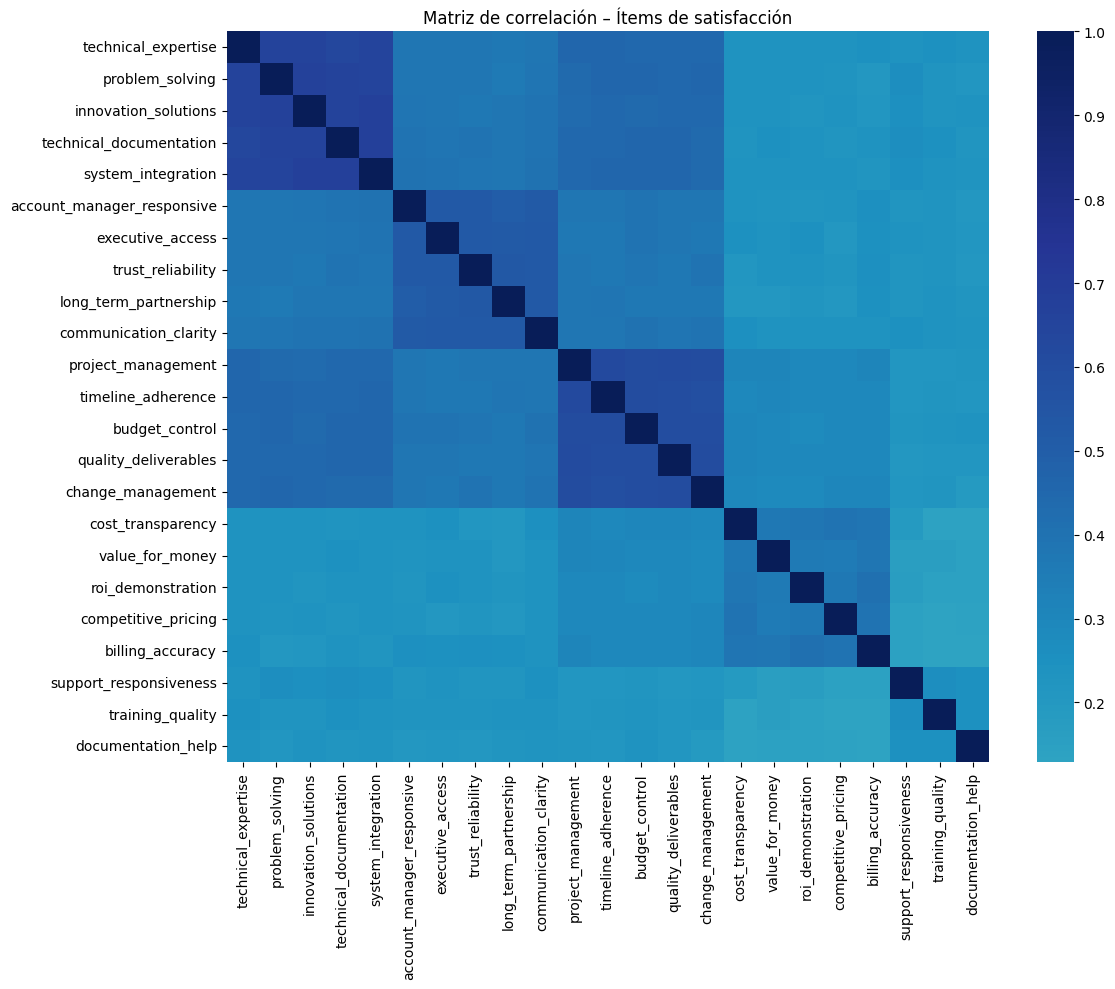

In [ ]:
# Matriz de correlación
# Se calcula y visualiza la correlación entre las variables de satisfacción.

plt.figure(figsize=(8, 10))
matriz_corr = tabla[vars_satisfaccion].corr()
sns.heatmap(
    matriz_corr,
    annot=False,
    cmap="YlGnBu",
    center=0
)
plt.title("Matriz de correlación – Ítems de satisfacción")
plt.tight_layout()
plt.show()


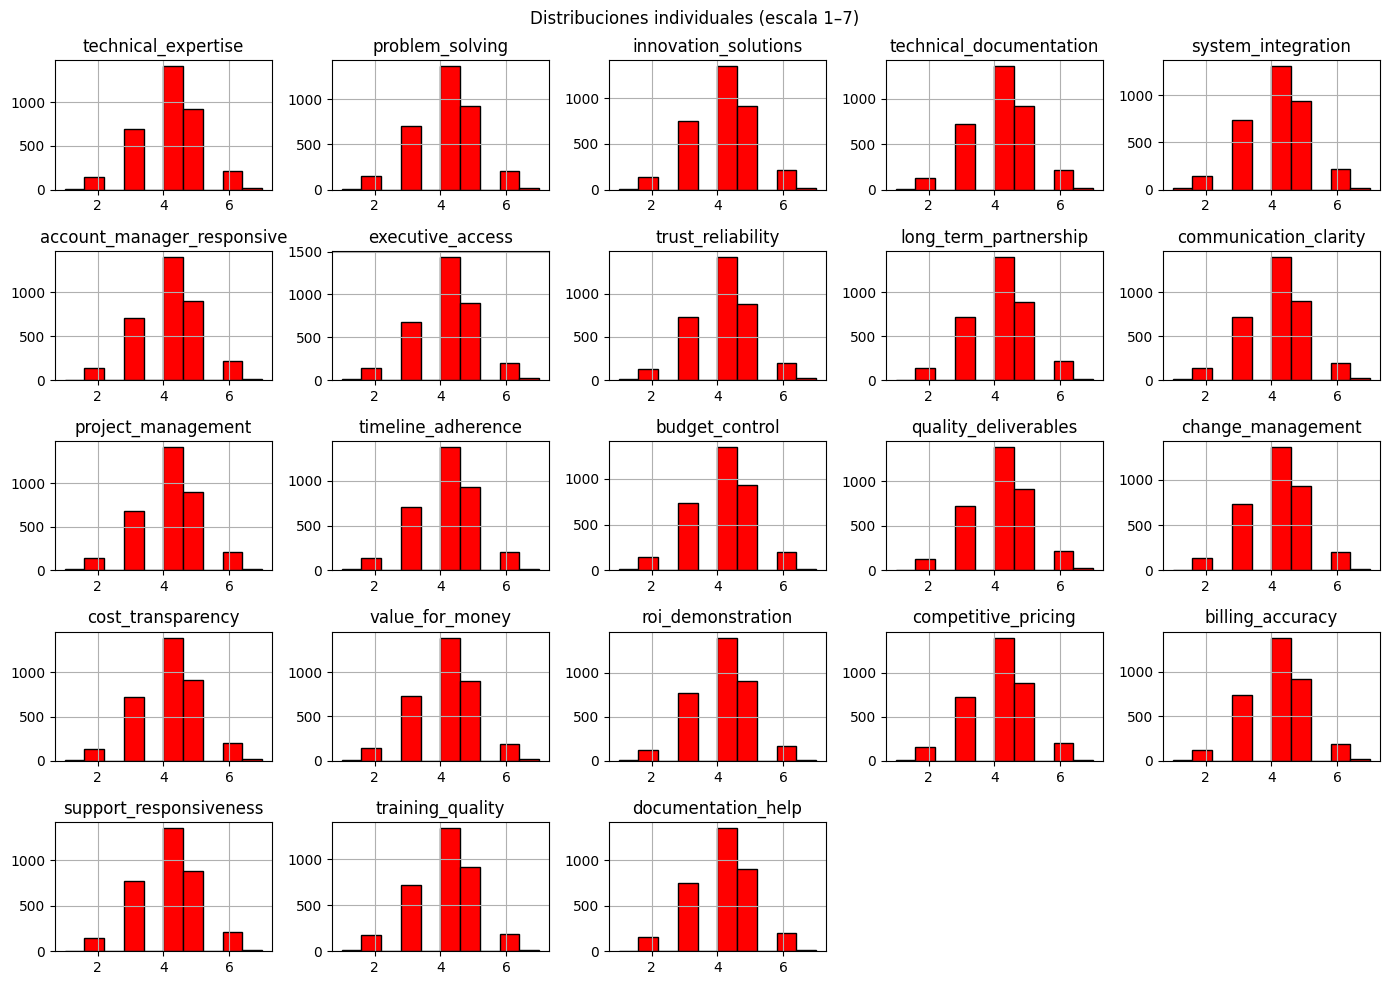

In [ ]:

# Se grafican las distribuciones de cada variable de satisfacción (escala 1–7).

tabla[vars_satisfaccion].hist(figsize=(14, 10), color='red', edgecolor='black')
plt.suptitle("Distribuciones individuales (escala 1–7)")
plt.tight_layout()
plt.show()
# Permite visualizar la forma de las respuestas y detectar sesgos o concentraciones en la escala



In [ ]:

from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


El conjunto tiene 3,400 encuestas de 2024, con 23 ítems de satisfacción en escala 1–7 que cubren técnica, relación, proyectos, valor y soporte. Los promedios están en nivel medio-alto, lo que indica clientes mayormente satisfechos. El porcentaje de faltantes es bajo (~5%), por lo que los datos son utilizables. La matriz de correlación muestra asociaciones positivas y claras entre ítems de la misma dimensión, lo que indica que hay factores comunes y que el análisis de factores es pertinente.


## 1.2 Idoneidad para análisis de factores

In [ ]:

# Se evalúa si los datos son adecuados para aplicar análisis.

tabla_af = tabla[vars_satisfaccion].dropna()  # Se eliminan filas con valores faltantes

# Prueba KMO: mide la adecuación muestral
kmo_todas, kmo_global = calculate_kmo(tabla_af)
print("KMO global:", round(kmo_global, 3))

# Prueba de esfericidad de Bartlett: verifica correlaciones suficientes
chi2_bart, p_bart = calculate_bartlett_sphericity(tabla_af)
print("Bartlett chi2:", chi2_bart)
print("Bartlett p-value:", p_bart)

if kmo_global >= 0.6 and p_bart < 0.05:
    print("\nLos datos SON adecuados para análisis DE FACTORES.")
else:
    print("\nLos datos NO son totalmente adecuados; revisar variables.")


KMO global: 0.959
Bartlett chi2: 33163.3781097932
Bartlett p-value: 0.0

Los datos SON adecuados para análisis DE FACTORES.


**¿Los datos son adecuados para análisis de factores?**
Sí. El tamaño de muestra es suficiente (3,400 casos), el porcentaje de faltantes es bajo y, sobre todo, las pruebas de idoneidad (KMO ≥ 0.6 y Bartlett con p < 0.05) indican que las variables de satisfacción están lo bastante correlacionadas para extraer factores.

**¿Qué sugieren los patrones iniciales sobre los factores subyacentes?**
Las correlaciones se agrupan por bloques de contenido (técnico, relación con el cliente, entrega de proyectos, valor/costo y soporte), lo que sugiere la existencia de varios factores diferenciados pero relacionados, alineados con el modelo teórico de 5 dimensiones del cuestionario.


# Parte 2: Extracción de factores y determinación

## 2.1 Determinación del número de factores

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



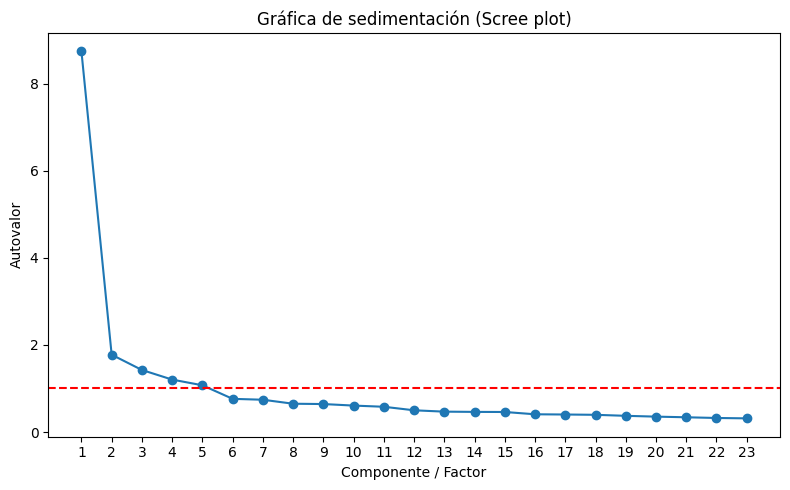

,factor,autovalor
0,1,8.746860
1,2,1.775636
2,3,1.424902
3,4,1.204049
4,5,1.073316
5,6,0.761920
6,7,0.741381
7,8,0.649656
8,9,0.642331
9,10,0.607177


In [ ]:

# Se calculan los autovalores y se utiliza la gráfica Scree Plot para definir cuántos factores conservar.

# Cálculo de autovalores (indican cuánta varianza explica cada factor)
fa_prueba = FactorAnalyzer(rotation=None)
fa_prueba.fit(tabla_af)
autovalores, varianza = fa_prueba.get_eigenvalues()

# Muestra el punto donde la varianza explicada se estabiliza ("codo").
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores)+1), autovalores, marker='o')
plt.axhline(1, linestyle='--', color='red')  # Línea de referencia (criterio de Kaiser)
plt.title("Gráfica de sedimentación (Scree plot)")
plt.xlabel("Componente / Factor")
plt.ylabel("Autovalor")
plt.xticks(range(1, len(autovalores)+1))
plt.tight_layout()
plt.show()


# Los factores con autovalores > 1 son los que más aportan al modelo.
autovalores_tabla = pd.DataFrame({
    "factor": range(1, len(autovalores)+1),
    "autovalor": autovalores
})
display(autovalores_tabla)


### Determina el número óptimo de factores y justifica tu elección.


De acuerdo con el criterio de Kaiser, se seleccionan los factores con autovalores mayores a 1.
En el gráfico de sedimentación (Scree Plot) se observa que los primeros cinco factores cumplen con esta condición, y el “codo” de la curva aparece entre el quinto y sexto componente.
Esto indica que a partir del sexto factor la varianza explicada adicional es mínima.

## 2.2 Extracción y rotación de factores

In [ ]:

# Se extraen 5 factores (según el resultado del Scree Plot) usando rotación Varimax para facilitar la interpretación.

num_factores = 5

# Creación del modelo de análisis de factores con rotación Varimax
analizador = FactorAnalyzer(n_factors=num_factores, rotation='varimax')
analizador.fit(tabla_af)

# Muestra qué variables se asocian más fuertemente con cada factor.
cargas = pd.DataFrame(
    analizador.loadings_,
    index=vars_satisfaccion,
    columns=[f"factor_{i+1}" for i in range(num_factores)]
)
display(cargas)

# Varianza explicada por cada factor
# Indica cuánta información aporta cada factor individual y acumulada.
var_exp = analizador.get_factor_variance()
var_exp_df = pd.DataFrame({
    "factor": [f"factor_{i+1}" for i in range(num_factores)],
    "varianza_prop": var_exp[0],
    "varianza_acum": var_exp[2]
})
display(var_exp_df)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,factor_1,factor_2,factor_3,factor_4,factor_5
technical_expertise,0.693090,0.218666,0.245795,0.165509,0.171094
problem_solving,0.713576,0.215043,0.247113,0.148878,0.167078
innovation_solutions,0.722124,0.220232,0.227864,0.148819,0.179049
technical_documentation,0.696983,0.242359,0.237961,0.152472,0.174627
system_integration,0.708587,0.244648,0.237709,0.153029,0.165983
account_manager_responsive,0.220830,0.609914,0.197060,0.174506,0.148261
executive_access,0.208767,0.627632,0.180511,0.178136,0.173122
trust_reliability,0.207134,0.643142,0.196303,0.165441,0.149036
long_term_partnership,0.195625,0.628262,0.194917,0.142276,0.176183
communication_clarity,0.211331,0.616934,0.198426,0.170793,0.198356


,factor,varianza_prop,varianza_acum
0,factor_1,3.177979,0.138173
1,factor_2,2.621246,0.252140
2,factor_3,2.617596,0.365949
3,factor_4,2.218706,0.462414
4,factor_5,1.028035,0.507111


### ¿Cuántos factores representan mejor los datos?

De acuerdo con el criterio de Kaiser (autovalores mayores a 1) y el gráfico de sedimentación (Scree Plot), el número óptimo de factores es cinco (5).
Los primeros cinco factores presentan autovalores superiores a 1, y el “codo” de la curva se observa entre el quinto y el sexto componente, lo que indica que a partir del sexto factor la varianza explicada adicional es mínima.

### ¿Qué representa cada factor en términos de negocio?

Después del análisis con componentes principales y rotación Varimax, se identificaron cinco factores que explican la mayor parte de la satisfacción del cliente en TechnoServe Solutions:

Excelencia Técnica e Innovación: mide la capacidad técnica, la resolución de problemas y la innovación en las soluciones ofrecidas.

Relación y Confianza con el Cliente: refleja la comunicación clara, la atención de los ejecutivos y la confianza que se genera con los clientes.

Gestión y Entrega de Proyectos: evalúa el cumplimiento de tiempos, presupuestos y la calidad de los entregables.

Valor y Transparencia Financiera: analiza la percepción del cliente sobre precios justos, retorno de inversión y claridad en los costos.

Soporte y Capacitación: muestra la calidad del soporte técnico y la efectividad de la capacitación al cliente.

# Parte 3: Interpretación y aplicación al negocio

## 3.1 Interpretación de factores

In [ ]:

# Se identifican las variables con mayor peso en cada factor para interpretarlos en términos de negocio.

vars_resultado = ['overall_satisfaction', 'nps_score', 'renewal_likelihood',
                  'revenue_growth_pct', 'referrals_generated']

# Se usa el mismo modelo  (5 factores, rotación Varimax)
num_factores = 5
modelo_fac = FactorAnalyzer(n_factors=num_factores, rotation='varimax')
modelo_fac.fit(tabla_af)

# Matriz de cargas
cargas = pd.DataFrame(
    modelo_fac.loadings_,
    index=vars_satisfaccion,
    columns=[f"factor_{i+1}" for i in range(num_factores)]
)

# Se seleccionan las variables con cargas absolutas mayores o iguales a 0.40
# Estas son las que más contribuyen a definir cada factor.
umbral = 0.40
interpreta = {}
for col in cargas.columns:
    vars_altas = cargas.index[cargas[col].abs() >= umbral].tolist()
    interpreta[col] = vars_altas

# Se crea una tabla resumen
interpretacion_factores = pd.DataFrame({
    "factor": list(interpreta.keys()),
    "variables_principales": list(interpreta.values())
})
display(interpretacion_factores)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,factor,variables_principales
0,factor_1,"[technical_expertise, problem_solving, innovat..."
1,factor_2,"[account_manager_responsive, executive_access,..."
2,factor_3,"[project_management, timeline_adherence, budge..."
3,factor_4,"[cost_transparency, value_for_money, roi_demon..."
4,factor_5,"[support_responsiveness, training_quality, doc..."


## 3.2 Insights de negocio y recomendaciones

In [ ]:

# Se calculan los puntajes de cada factor por observación para usarlos en el análisis de negocio.

puntajes = modelo_fac.transform(tabla_af)
df_puntajes = pd.DataFrame(
    puntajes,
    columns=[f"factor_{i+1}" for i in range(num_factores)]
).reset_index(drop=True)

tabla_sin_na = tabla.dropna(subset=vars_satisfaccion).reset_index(drop=True)
tabla_factores = pd.concat([tabla_sin_na.reset_index(drop=True), df_puntajes], axis=1)
display(tabla_factores.head())

# Validación contra variables de resultado
# Se analizan las correlaciones entre los factores y los indicadores de negocio (satisfacción, NPS, renovación, etc.)
corr_fact_out = tabla_factores[
    [f"factor_{i+1}" for i in range(num_factores)] + vars_resultado
].corr().loc[[f"factor_{i+1}" for i in range(num_factores)], vars_resultado]
display(corr_fact_out)

# Se aplican regresiones lineales para ver qué factores explican mejor cada variable de resultado.
X = tabla_factores[[f"factor_{i+1}" for i in range(num_factores)]]
resultados_modelos = []

for y_var in vars_resultado:
    y = tabla_factores[y_var]
    modelo = LinearRegression()
    modelo.fit(X, y)
    coeficientes = modelo.coef_
    resultados_modelos.append({
        "variable_objetivo": y_var,
        "factor_1": coeficientes[0],
        "factor_2": coeficientes[1],
        "factor_3": coeficientes[2],
        "factor_4": coeficientes[3],
        "factor_5": coeficientes[4],
        "intercepto": modelo.intercept_
    })

tabla_modelos = pd.DataFrame(resultados_modelos)
display(tabla_modelos)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated,factor_1,factor_2,factor_3,factor_4,factor_5
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4,6,4,12.3,1,0.255181,0.995812,-0.293318,1.598407,-0.667067
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4,5,3,17.8,0,-0.526080,1.459695,0.238982,-1.002367,-0.573201
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,3,4,3,-7.8,0,-0.678224,0.270250,-0.190332,-0.783389,-0.588150
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4,5,2,-13.4,0,0.023157,-1.738459,0.059329,-0.398021,-0.880117
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,5,5,4,3.7,2,0.731243,0.938809,0.476542,-0.284358,0.112805


,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
factor_1,0.437798,0.274455,0.343808,0.428149,0.267650
factor_2,0.421310,0.300832,0.340033,0.439169,0.270836
factor_3,0.413777,0.288766,0.320357,0.401185,0.283621
factor_4,0.394755,0.263318,0.336119,0.389221,0.254391
factor_5,0.375829,0.291182,0.309356,0.378754,0.232555


,variable_objetivo,factor_1,factor_2,factor_3,factor_4,factor_5,intercepto
0,overall_satisfaction,0.320715,0.300691,0.289152,0.301316,0.263034,4.127048
1,nps_score,0.412229,0.461567,0.441731,0.421072,0.497710,6.164760
2,renewal_likelihood,0.232341,0.224825,0.202809,0.243525,0.205295,3.073879
3,revenue_growth_pct,3.157095,3.239861,2.805813,3.000442,2.696055,6.108192
4,referrals_generated,0.355459,0.357898,0.377047,0.355531,0.290779,1.612056


### ¿Qué factores impulsan más la satisfacción del cliente?

De acuerdo con los resultados del análisis de factores y las correlaciones con la variable overall_satisfaction, los factores que más influyen en la satisfacción del cliente son:

- Relación y Confianza con el Cliente, ya que una comunicación clara y un manejo responsable de la relación comercial fortalecen la percepción positiva del servicio.

- Gestión y Entrega de Proyectos, porque el cumplimiento de plazos, presupuestos y la calidad de los entregables tienen un impacto directo en la experiencia del cliente.

- Soporte y Capacitación, que refuerza la satisfacción a largo plazo al brindar acompañamiento y soluciones después de la entrega del proyecto.

### ¿Qué acciones específicas debería tomar TechnoServe?

Con base en los factores más influyentes, se proponen las siguientes acciones estratégicas:

1. Fortalecer la relación con los clientes:

- Implementar reuniones de seguimiento personalizadas.

- Mejorar la comunicación entre los ejecutivos de cuenta y los clientes clave.

2. Optimizar la gestión de proyectos:

- Usar herramientas de control de tiempos y presupuestos.

- Crear protocolos para garantizar entregables consistentes y de alta calidad.

3. Mejorar el soporte y la capacitación:

- Ofrecer entrenamientos breves post-implementación.

- Desarrollar un canal de soporte rápido y accesible para incidencias.

# Parte 4: Comunicación y presentación

 ## 4.1 Visualización

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



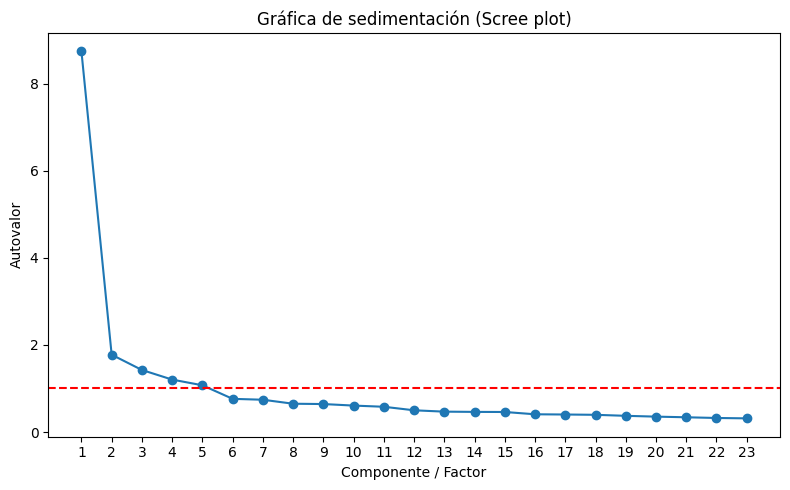

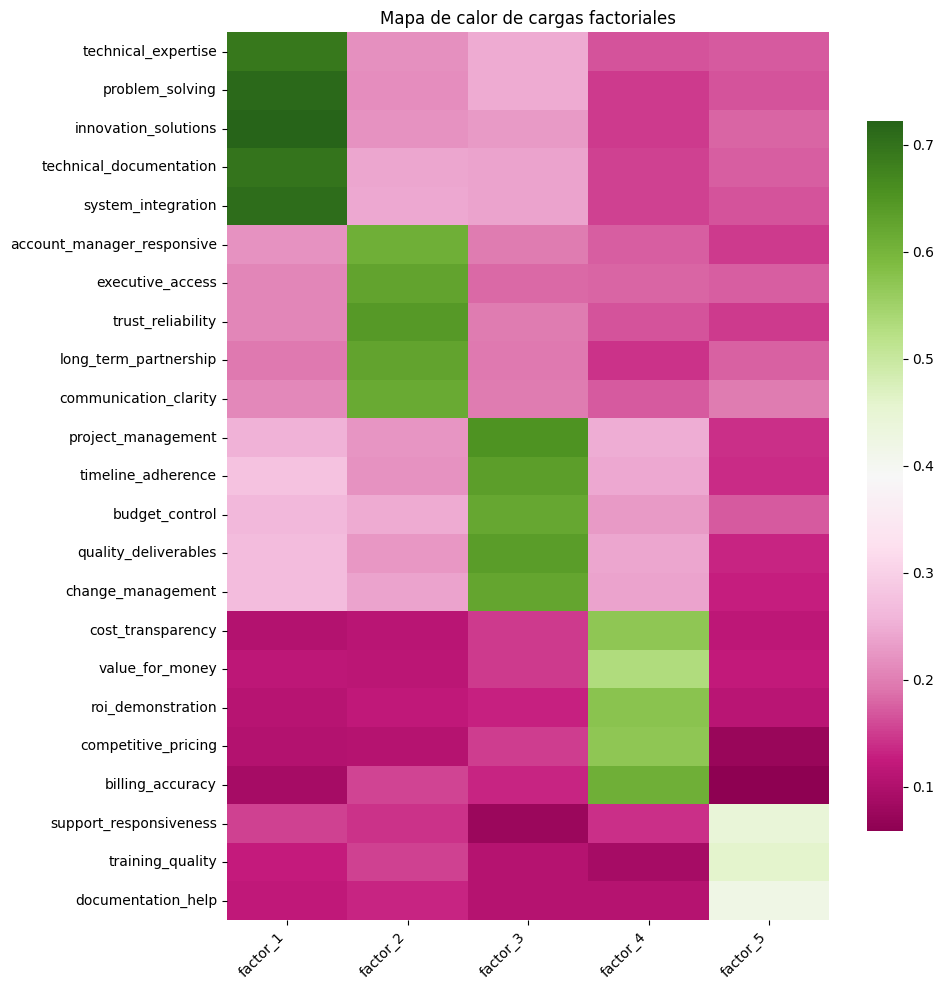

In [ ]:
# Visualización: cargas, Scree, puntajes e impacto
# Se generan las principales gráficas para resumir los resultados del análisis de factores.

num_factores = 5
modelo_fac = FactorAnalyzer(n_factors=num_factores, rotation='varimax')
modelo_fac.fit(tabla_af)

# Cargas de los factores (qué tan fuertemente se asocia cada variable a cada factor)
cargas = pd.DataFrame(
    modelo_fac.loadings_,
    index=vars_satisfaccion,
    columns=[f"factor_{i+1}" for i in range(num_factores)]
)

# Varianza explicada por factor (proporcional y acumulada)
var_prop, var_comun, var_acum = modelo_fac.get_factor_variance()
var_exp_df = pd.DataFrame({
    "factor": [f"factor_{i+1}" for i in range(num_factores)],
    "varianza_prop": var_prop,
    "varianza_acum": var_acum
})

# Permite confirmar visualmente el número óptimo de factores mediante el "codo" del gráfico.
fa_prueba = FactorAnalyzer(rotation=None)
fa_prueba.fit(tabla_af)
autovalores, _ = fa_prueba.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores)+1), autovalores, marker='o')
plt.axhline(1, linestyle='--', color='red')
plt.title("Gráfica de sedimentación (Scree plot)")
plt.xlabel("Componente / Factor")
plt.ylabel("Autovalor")
plt.xticks(range(1, len(autovalores)+1))
plt.tight_layout()
plt.show()

# Visualiza la fuerza de asociación de cada variable con los factores.
plt.figure(figsize=(10, 10))
sns.heatmap(
    cargas.abs(),
    cmap="PiYG",
    annot=False,
    cbar_kws={"shrink": .8}
)
plt.title("Mapa de calor de cargas por factores")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


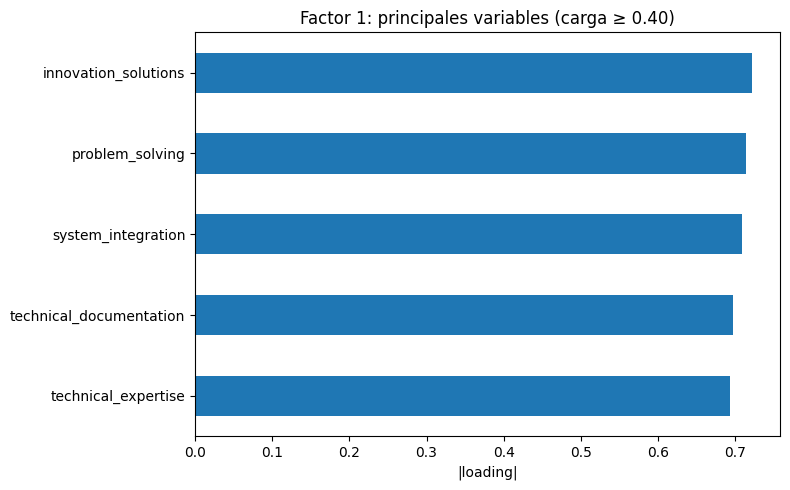

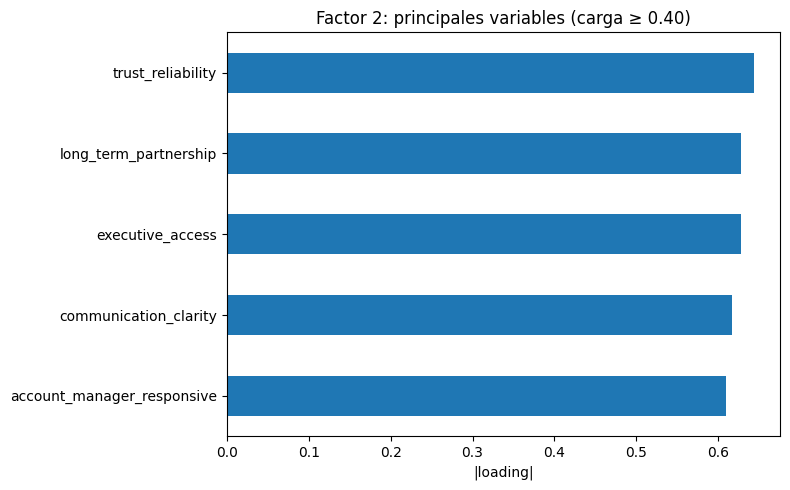

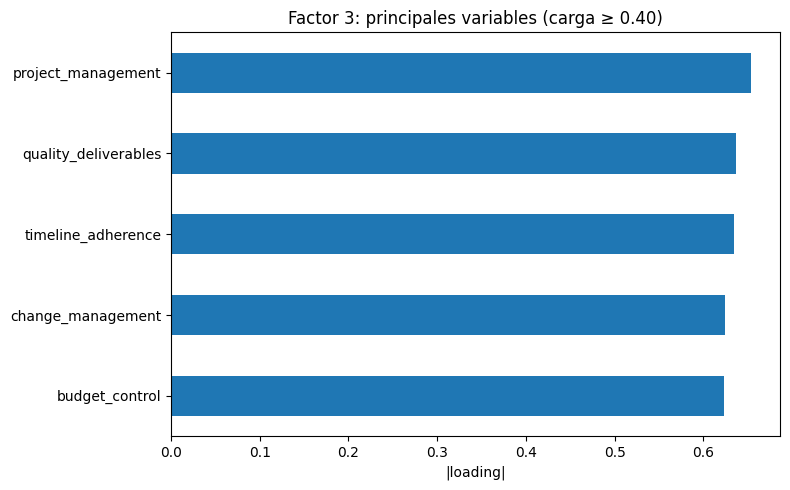

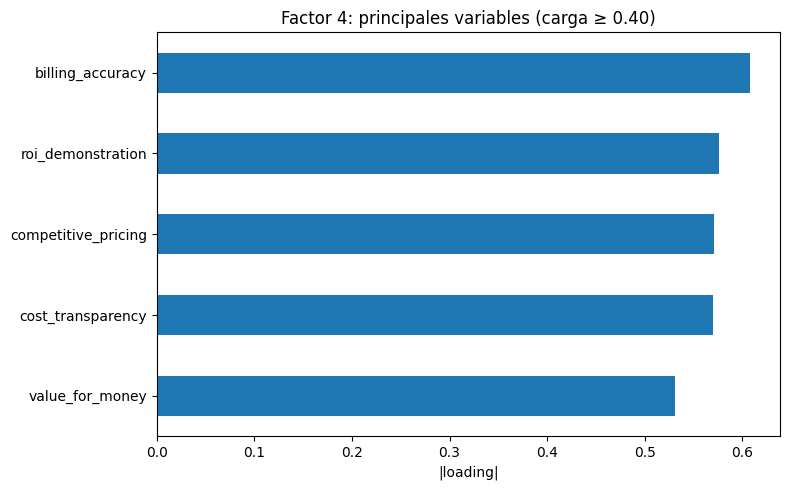

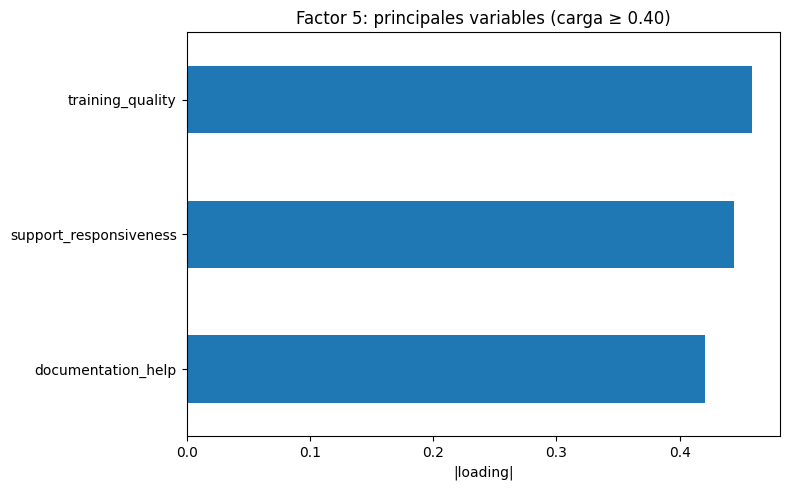

In [ ]:
# Barras por factor – principales variables según carga de factores
# Se grafican las variables con mayor peso para cada factor.

umbral = 0.40
for i in range(num_factores):
    serie = cargas.iloc[:, i].abs().sort_values(ascending=False)
    top = serie[serie >= umbral].head(12)  # Variables más representativas del factor
    plt.figure(figsize=(8, 5))
    top[::-1].plot(kind='barh')  # Barras horizontales (de menor a mayor)
    plt.title(f"Factor {i+1}: principales variables (carga ≥ 0.40)")
    plt.xlabel("|loading|")
    plt.tight_layout()
    plt.show()
# Permite identificar visualmente qué variables definen cada factor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



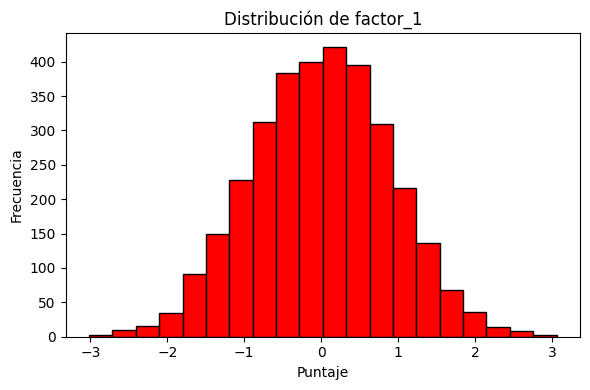

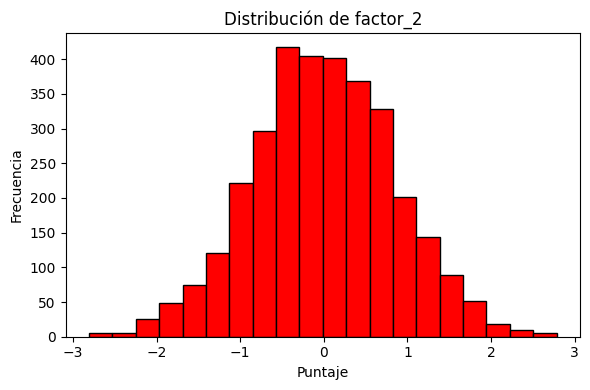

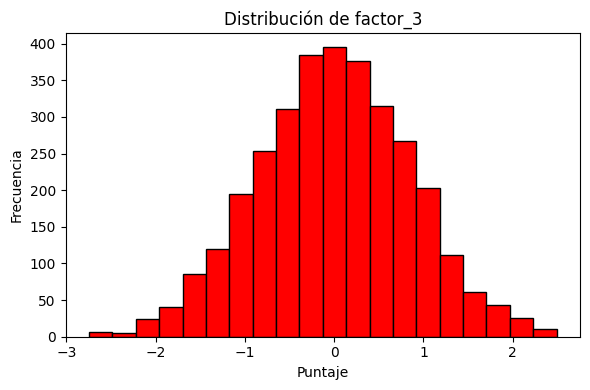

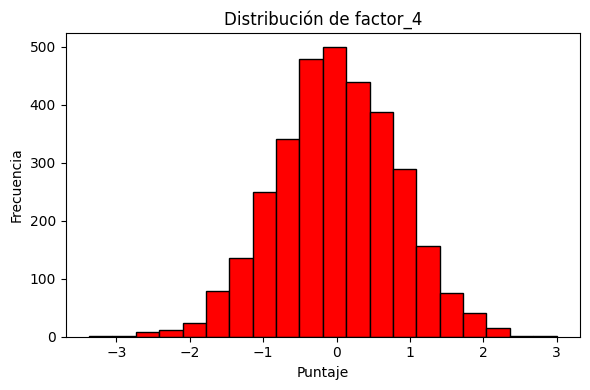

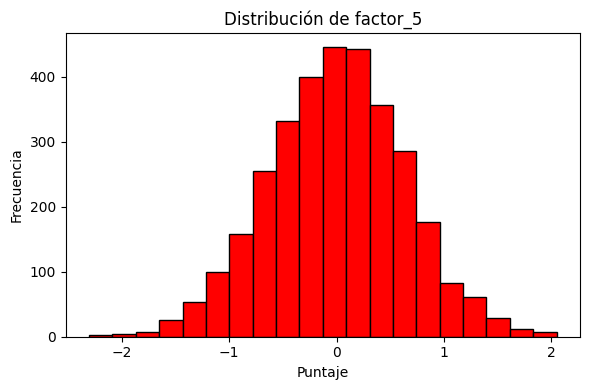

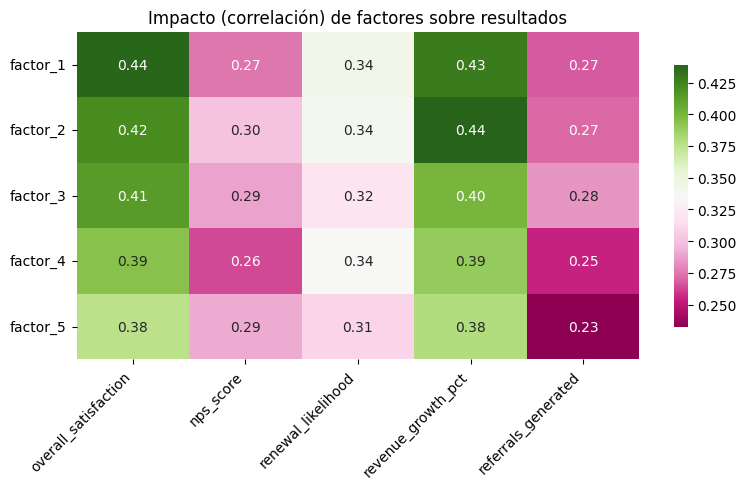

In [ ]:
# Puntajes de factores y distribuciones
# Se calculan los puntajes de cada factor y se visualiza su distribución.

puntajes = modelo_fac.transform(tabla_af)
factores_cols = [f"factor_{i+1}" for i in range(num_factores)]
tabla_puntajes = pd.DataFrame(puntajes, columns=factores_cols)

for col in factores_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(tabla_puntajes[col], bins=20, color='red', edgecolor='black')
    plt.title(f"Distribución de {col}")
    plt.xlabel("Puntaje")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
# Permite observar la dispersión de los puntajes en la muestra


# Se combinan los puntajes de factores con los datos originales
tabla_sin_na = tabla.dropna(subset=vars_satisfaccion).reset_index(drop=True)
tabla_factores = pd.concat([tabla_sin_na.reset_index(drop=True), tabla_puntajes.reset_index(drop=True)], axis=1)

# Correlación factores vs resultados (
# Mide cómo se relaciona cada factor con las variables de negocio
corr_fact_out = tabla_factores[factores_cols + vars_resultado].corr().loc[factores_cols, vars_resultado]

plt.figure(figsize=(8, 5))
sns.heatmap(
    corr_fact_out,
    cmap="PiYG",
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": .8}
)
plt.title("Impacto (correlación) de factores sobre resultados")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 4.2 Resumen ejecutivo



**Empresa:** TechnoServe Solutions  
**Base:** 3,400 respuestas (2024), 23 ítems de satisfacción

### 1. Objetivo
Reconocer qué partes reales del servicio explican la satisfacción, la recomendación  y la renovación, y convertirlo en acciones para la dirección.

### 2. Estructura
El análisis de factores con Varimax separó 5 factores que explican 50.7 % de la varianza. La estructura coincide con la forma en que la empresa atiende al cliente, por lo que puede usarse como indicador de gestión.

### 3. Factores
1. **Excelencia técnica (13.8 %):** saber, resolver, integrar y documentar.
2. **Relación, acceso y confianza (11.4 %, ac. 25.2 %):** respuesta del account, acceso a ejecutivos, claridad. Clave para NPS.
3. **Entrega y cumplimiento (11.4 %, ac. 36.6 %):** tiempos, presupuesto, cambios. Clave para renovación.
4. **Valor, precio y ROI (9.6 %, ac. 46.2 %):** facturación correcta, transparencia, precio justo.
5. **Soporte y capacitación (4.5 %, ac. 50.7 %):** soporte rápido y buen  material, impulsa referidos.

### 4. Lectura para el negocio
El cliente califica 5 momentos: que sepa, que lo atiendan, que cumpla, que cobre claro y que lo sigan ayudando. Arreglar solo uno no basta.

### 5. Recomendaciones
1. Estandarizar relación y tiempos de respuesta.
2. Cerrar cada hito con hoja de valor.
3. Conservar soporte visible post–entrega.

### 6. Impacto esperado
- Mejor satisfacción y NPS.
- Más renovación.
- Cartera más estable y más referidos.


## Team Information
**Team:** [Equipo 5]
**Members:**
- [Cristian Cruz Orozco ] ([A01665590]) - Data Science and Mathematics Engineering
- [Alan Ulises Luna Hernández] ([A01424523]) - Data Science and Mathematics Engineering
- [Axel Palacios Granados] ([A01666972]) - Data Science and Mathematics Engineering

**Deliverable Links:**
- **Presentation Video:** [https://youtu.be/zWHmeM03y9s?si=Ji_EV-GlsqSTPz2U]
- **Executive Summary:** [Disponible en Canvas]
- **Dataset:** `customer_satisfaction_data.csv`
**Completion Date:** [02/11/2025]